# Отчет к лабораторной работе №2 "Проверка гипотезы о значимости корреляции методов фотоплетизмографии"
# по курсу: «Методы математической обработки медико-биологических данных»
## Выполнил студент группы БМТ1-22М Колокольников Георгий

## Цель работы:
### Определить, присутствует ли корреляция между значениями фотоплетизмограммы, полученными тремя разными методами: контактной ФПГ, бесконтактной ФПГ и видео-ФПГ

## Задачи и этапы работы


I. Исследование корреляции методов ФПГ в 20 различных моментах времени записей одного обследуемого:  
1) Считать записи контактной, бесконтактной и видео-ФПГ;   
2) Определить участки записей, на которых ФПГ вышла в стабильный режим измерения;   
3) Выбрать из найденного участка 20 произвольных моментов времени и сохранить в массив значения ФПГ для каждого метода;   
4) Рассчитать оценку выборочного коэффициента корреляции для комбинаций методов ФПГ, построить матрицу корреляции методов;   
5) Проверить гипотезу о значимости корреляции, определить уровень доверия, при котором принимается гипотеза о корреляции методов.

## Исследование корреляции методов ФПГ в 20 различных моментах времени записей одного обследуемого

0. Импортируем необходимые программные пакеты

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

1. Считаем записи контактной, бесконтактной и видео-ФПГ

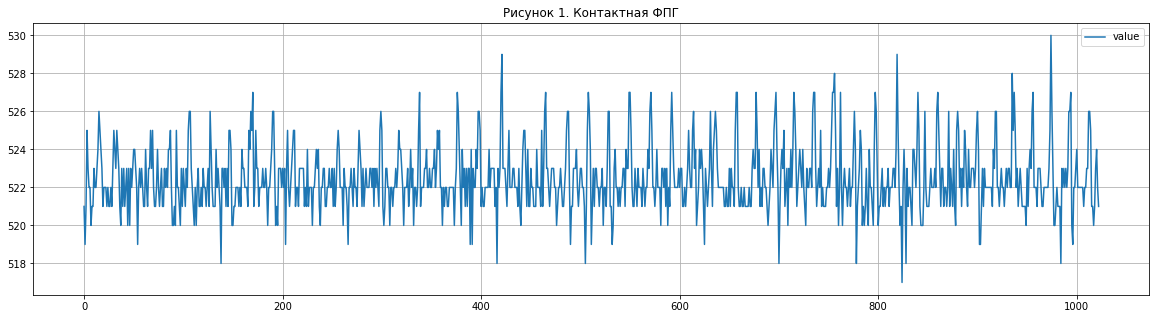

In [2]:
fpg_contact = pd.read_csv('Data/Kolokolnikov_1_27.04.19/Contact.txt', header=None, names=["time", "value"], parse_dates=True)
fpg_contact.plot(kind="line", y="value", figsize=(20,5), grid=True, title="Рисунок 1. Контактная ФПГ")
plt.show()

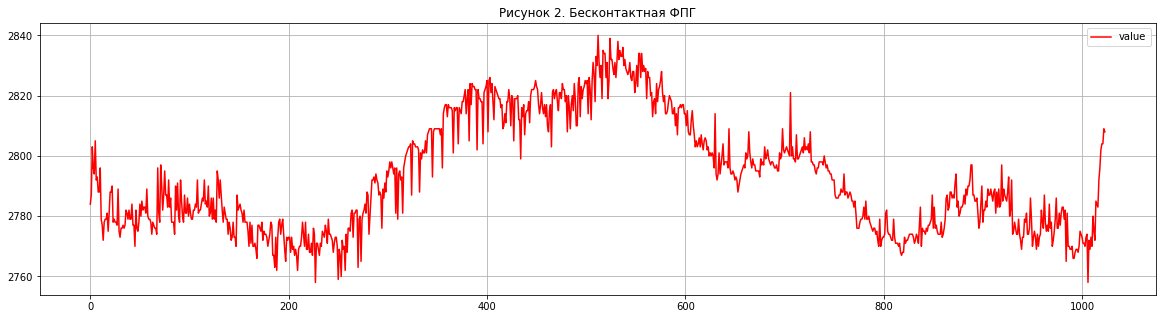

In [3]:
fpg_conless = pd.read_csv('Data/Kolokolnikov_1_27.04.19/Contactless.txt', header=None, names=["time", "value"], parse_dates=True)
fpg_conless.plot(kind="line", y="value", figsize=(20,5), grid=True, title="Рисунок 2. Бесконтактная ФПГ", c="r")
plt.show()

Для видео-ФПГ следует выбрать зеленый канал в цветовой модели RGB

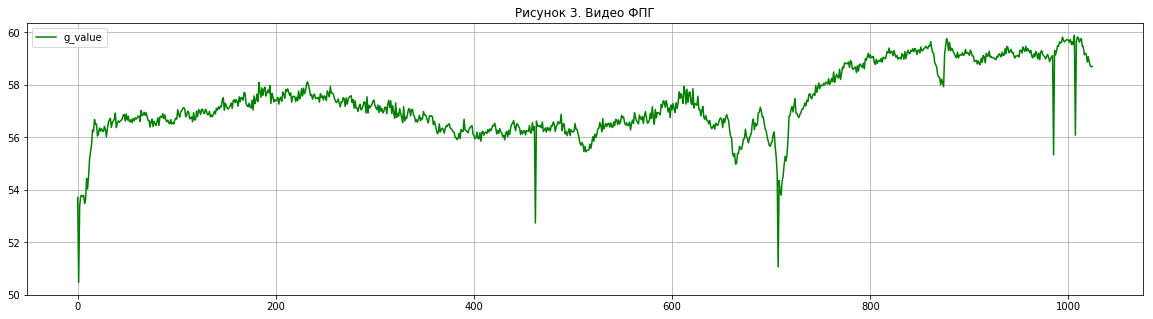

In [4]:
fpg_video = pd.read_csv('Data/Kolokolnikov_1_27.04.19/Video.txt', header=None, names=["time", "r_value", "g_value", "b_value"],
                        parse_dates=True)
fpg_video.plot(kind="line",y="g_value", figsize=(20,5), grid=True, title="Рисунок 3. Видео ФПГ", c="g")
plt.show()

2. В качестве периода выхода в стабильный режим измерения примем первые 100 отсчетов. 

In [5]:
start = 100

3.1. Выберем из найденного участка 20 произвольных моментов времени

In [6]:
end = fpg_contact["time"].shape[0]
time_points = []
random.seed(15)
for x in range(20):
    time_points.append(random.randint(start,end))
time_points = np.sort(np.array(time_points))
time_points

array([ 111,  117,  137,  156,  219,  250,  261,  313,  344,  345,  446,
        476,  577,  633,  797,  811,  853,  924,  977, 1000])

3.2. Cохраним для каждого метода ФПГ в массив значения, соответствующие выбранным отсчетам времени  

In [7]:
contact_values = fpg_contact.iloc[time_points]["value"].values
conless_values = fpg_conless.iloc[time_points]["value"].values
video_values = fpg_video.iloc[time_points]["g_value"].values

3.3. Построим отобранные точки

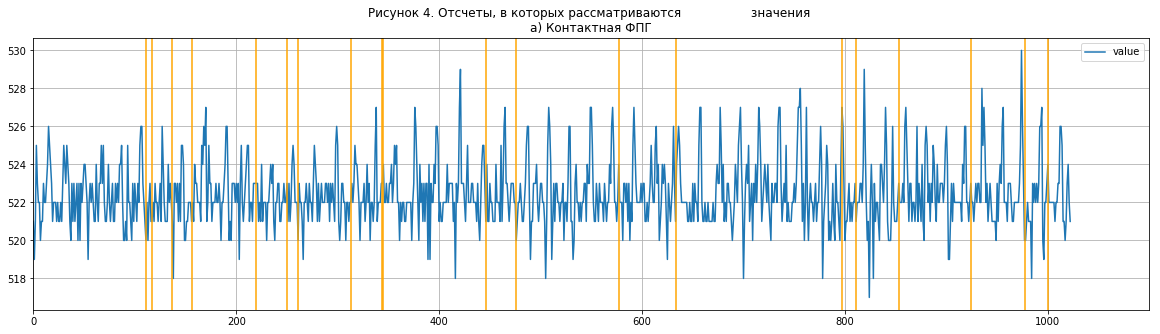

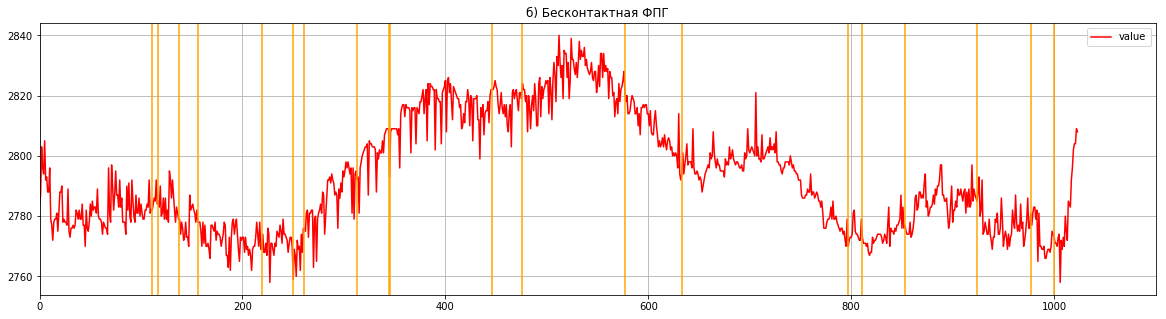

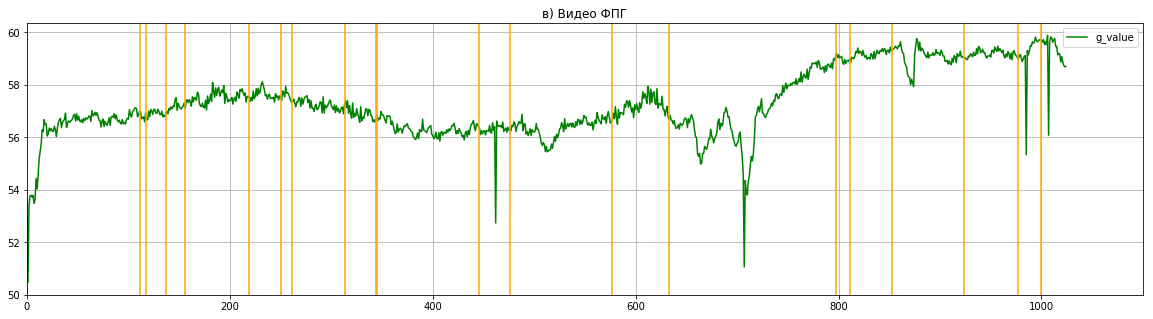

In [8]:
fpg_contact.plot(kind="line", y="value", figsize=(20,5), grid=True, title="Рисунок 4. Отсчеты, в которых рассматриваются \
                 значения \nа) Контактная ФПГ", xlim=(0,1100))
for coord in time_points:
    plt.axvline(x=coord, c="orange")
fpg_conless.plot(kind="line", y="value", figsize=(20,5), grid=True, title="б) Бесконтактная ФПГ", c="r", xlim=(0,1100))
for coord in time_points:
    plt.axvline(x=coord, c="orange")
fpg_video.plot(kind="line",y="g_value", figsize=(20,5), grid=True, title="в) Видео ФПГ", c="g", xlim=(0,1100))
for coord in time_points:
    plt.axvline(x=coord, c="orange")

4. Рассчитать оценку выборочного коэффициента корреляции для комбинаций методов ФПГ, построить матрицу корреляции методов

Таблица значений

In [9]:
data_dict ={"Contact_FPG":contact_values, "Contactless_FPG":conless_values, "Video_FPG":video_values}
num_elems = contact_values.shape[0]
pd.DataFrame(data_dict)

,Contact_FPG,Contactless_FPG,Video_FPG
0,520,2782,56.9989
1,521,2785,56.9476
2,521,2779,56.9010
3,521,2778,57.1022
4,523,2769,57.5672
5,523,2759,57.5487
6,520,2776,57.3271
7,522,2792,57.2537
8,523,2809,56.7162
9,524,2793,56.8447


4.1. Напишем функцию для расчета оценки выборочного коэффициента корреляции

In [10]:
def corr_coeff(X_value, Y_value):
    numerator = (np.sum(X_value*Y_value) - num_elems*np.mean(X_value)*np.mean(Y_value))
    denominator = np.sqrt((np.sum(X_value**2) - num_elems*np.mean(X_value)**2)*
                          (np.sum(Y_value**2) - num_elems*np.mean(Y_value)**2))
    return np.abs(numerator/denominator)

In [11]:
XX = 1
YY = 1
ZZ = 1
XY = corr_coeff(contact_values, conless_values)
XZ = corr_coeff(contact_values, video_values)
YZ = corr_coeff(conless_values, video_values)
YX = XY
ZY = YZ
ZX = XZ

4.2. Составим матрицу корреляции

In [12]:
print("\t\t\tКонтактная ФПГ\t|\tБесконтактная ФПГ\t|\tВидео ФПГ \
           \nКонтактная ФПГ   |\t\t{}\t\t\t{:.3f}\t\t\t{:.3f} \
           \nБесконтактная ФПГ|\t\t{:.3f}\t\t\t{}\t\t\t{:.3f} \
           \nВидео ФПГ\t |\t\t{:.3f}\t\t\t{:.3f}\t\t\t{}".format(XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ))

			Контактная ФПГ	|	Бесконтактная ФПГ	|	Видео ФПГ            
Контактная ФПГ   |		1			0.167			0.372            
Бесконтактная ФПГ|		0.167			1			0.603            
Видео ФПГ	 |		0.372			0.603			1


5. Проверить гипотезу о значимости корреляции, определить уровень доверия, при котором принимается гипотеза о корреляции методов.

Отдельно проверяем гипотезы о попарной корреляции методов: XY, XZ, YZ.     
Гипотеза H0: истинное значение корреляции равно нулю.    
Рассчитаем величину:

In [13]:
def w_value(coeff):
    return (np.sqrt(num_elems-3)/2)*np.log(np.abs((1+coeff)/(1-coeff)))

Если величина w_value попадает в диапазон [Z(-a/2); Z(a/2)], где Z(a) - значение Z-распределения с данным уровнем доверия a, то гипотеза принимается.

In [14]:
w_value_XY = w_value(XY)
w_value_XZ = w_value(XZ)
w_value_YZ = w_value(YZ)
print("Для контактной-бесконтактной: {:.3f}\
       \nДля контактной-видео: {:.3f}\
       \nДля бесконтактной-видео {:.3f}\n".format(w_value_XY, w_value_XZ, w_value_YZ))

Для контактной-бесконтактной: 0.696       
Для контактной-видео: 1.611       
Для бесконтактной-видео 2.876



Определим уровень доверия, при котором гипотеза отклоняется (то есть присутствует корреляция). Для этого нужно, чтобы значение w_value не попадало в диапазон [Z(-a/2); Z(a/2)]. Рассмотрим таблицу значений Z-распределения:

<img src="images/z_table.png">

Для того, чтобы гипотеза об отсутствии корреляции была отклонена для случая контактная/бесконтактная ФПГ, требуется w=0.696 > 0.69.    
Z(a/2)=0.69 достигается при a/2 = 0.2451 => при уровне доверия a = 0.4902.

Для того, чтобы гипотеза об отсутствии корреляции для случая контактная/видео-ФПГ была отклонена, требуется w=1.621 > 1.62.
Z(a/2)=1.62 достигается при a/2 = 0.0526 => при уровне доверия a = 0.1052.

Для того, чтобы гипотеза об отсутствии корреляции для случая бесконтактная/видео-ФПГ была отклонена, требуется w=2.876 > 2.87.
Z(a/2)=2.87 достигается при a/2 = 0.00205 => при уровне доверия a = 0.00410.

## Заключение

Таким образом:
- контактная ФПГ и бесконтактная ФПГ коррелируют с коэффициентом 0.167 с уровнем доверия a = 0.49;
- контактная ФПГ и видео-ФПГ коррелируют с коэффициентом 0.372 с уровнем доверия a = 0.11;
- бесконтактная ФПГ и видео-ФПГ коррелируют с коэффициентом 0.603 с уровнем доверия a = 0.004.